In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "../data/Thedog.ttf"   
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [16]:
df = pd.read_csv('../data/cctv_seoul.csv')
#df['CCTV비율'], df['노인비율'] = [col/df['인구수']*100 for col in (df['CCTV수'],df['고령자'])]
#df[] = df[]/df[]*100

In [20]:
## 1
def pct(a, b) :
    return a/b*100

df['CCTV비율'] = df.apply(lambda x : pct(x['CCTV수'],x['인구수']),axis=1)
df['노인비율'] = df.apply(lambda x : pct(x['고령자'],x['인구수']),axis=1)

display(df.head())

,구별,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    746 non-null    int64 
 1   pid     746 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.8+ KB
None


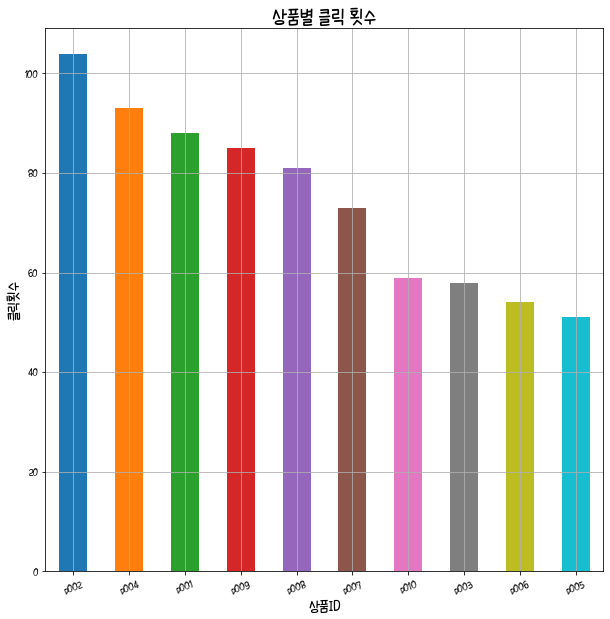

In [77]:
## 2
#1
df_log = pd.read_csv('../data/product_click.log', header=None, sep=' ')
df_log.columns = ["date", "pid"]
#display(df_log)
print(df_log.info())
df_count = df_log.groupby('pid').count().sort_values(by='date',ascending=False)
df_count.rename(columns={'date':'count'}, inplace=True)
#display(df_count)

#print(len(df_count.index))
mycolors = plt.get_cmap("tab10", len(df_count.index)) #sns.color_pallette('hls', len(df_count.index))

plt.figure(figsize=(10,10))
df_count['count'].plot(kind='bar',rot=20, grid=True, color=mycolors.colors) # plt.bar(df_count.index, df_coount.count, )
plt.xlabel('상품ID', size=15)
plt.ylabel('클릭횟수', size=15)
plt.title('상품별 클릭 횟수', size=20)
plt.savefig("../output/hw10.png") 
plt.show()

In [114]:
#2
day = ['월','화','수','목','금','토','일']
df_log['new_date'] = df_log['date'].map(str)
df_log['new_date'] = pd.to_datetime(df_log['new_date'])


df_log['day'] = df_log['new_date'].dt.weekday
day_group = df_log.groupby('day')
count_rank = day_group.count().sort_values(by='pid',ascending=False)


print('클릭 수가 제일 많은 요일은 '+day[count_rank.index[0]]+'요일입니다.')

클릭 수가 제일 많은 요일은 목요일입니다.


In [130]:
#3
df_log['time'] = df_log['new_date'].dt.hour
time_rank = df_log.groupby('time').count().sort_values(by='pid',ascending=False)

print(time_rank.index[0],'시와 ',(time_rank.index[0]+1),'시 사이에 제일 많이 클릭했습니다.')

9 시와  10 시 사이에 제일 많이 클릭했습니다.


In [5]:
## 3
#1
df_emp = pd.read_csv('../data/emp.csv')
df_dept_sal = df_emp.loc[:,['deptno','sal']]
df_dept_sal.groupby('deptno').sum()

#deptno = df_emp.groupby(['deptno'])
#display(pd.DataFrame(deptno.sum()['sal']))

#display(df_mep.groupby('deptno').agg({'sal':'sum'}))

,sal
deptno,
10,8750
20,10875
30,9400


In [195]:
#2
df_job_sal = df_emp.loc[:,['job','sal']]
df_job_sal.groupby('job').sum()
#display(df_mep.groupby('job').agg({'sal':'sum'}))

,sal
job,
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [202]:
#3
df_new = df_emp.loc[:,['deptno','job','sal','hiredate']]
#print(df_new.info())
df_new['hiredate'] = pd.to_datetime(df_new['hiredate'])
#print(df_new.info())
#print(df_new['sal'].max())

hire = df_new.groupby(['deptno','job']).hiredate.min()
display(hire)
#grouped = df_new.groupby(['deptno','job'])
#group_filter = grouped.apply(lambda x: x.max())
#print(group_filter)


#group_new[]
#df_job_sal.groupby('job').sum()

deptno  job      
10      CLERK       1982-01-25
        MANAGER     1981-09-06
        PRESIDENT   1981-11-17
20      ANALYST     1981-12-13
        CLERK       1980-12-17
        MANAGER     1981-03-02
30      CLERK       1981-12-03
        MANAGER     1981-05-01
        SALESMAN    1981-02-03
Name: hiredate, dtype: datetime64[ns]

In [6]:
display(df_emp.groupby(['deptno', 'job']).agg({'sal':'max', 'hiredate':'min'}))

sal    hiredate
deptno job                        
10     CLERK      1300  1982-01-25
       MANAGER    2450  1981-09-06
       PRESIDENT  5000  1981-11-17
20     ANALYST    3000  1981-12-13
       CLERK      1100  1980-12-17
       MANAGER    2975  1981-03-02
30     CLERK       950  1981-12-03
       MANAGER    2850  1981-05-01
       SALESMAN   1600  1981-02-03

In [12]:
#4
sal_max = df_emp.groupby(['job','deptno']).sal.max()
display(pd.DataFrame(sal_max))

display(df_emp.groupby(['job','deptno']).agg({'sal':'max'}))

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600